# Project Foundations for Data Science: FoodHub Data Analysis


### Import the required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import libraries for data manipulation
import numpy as np
import pandas as pd

#Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Explore the structure of the data

In [3]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/FoodHub_Project/foodhub_order.csv')
#Return the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### How many rows and columns are present in the data?

In [4]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1898
Number of columns: 9


#### Observations:
The print output shows the number of rows and columns of the DataFrame.


### What are the datatypes of the different columns in the dataset?

In [5]:
#Use info() to print a concise summary of the DataFrame
df = pd.DataFrame(df)
df.info()
print("Data types of columns:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
Data types of columns:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food

#### Observations:
This dataframe is well-formed, and includes information about the structure and memory usage. The data types of each column in the dataframe have been defined as well: the RangeIndex is 1898 entries (indexed from 0-1897) and 9 columns (0-8) each with a name, non-null count, and data type (technically indicating there are no missing values across these columns). The Dtypes in this dataFrame are integer (total of 4), object (total of 4), and float (total of 1).  


### Are there any missing values in the data? If yes, treat them using an appropriate method.

In [6]:
#Check for missing values across all columns
print(df.isnull().sum())

#Replace 'Not given' ratings with NaN, then convert 'rating' to numeric,
# replacing remaining non-numeric values with NaN, and finally fill NaNs with 0
df['rating'] = df['rating'].replace('Not given', pd.NA)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0)

#Count the number of missing values in 'rating' after replacement
#This should count the number of 'not given' ratings that were replaced with 0
print("Number of 'not given' ratings replaced with 0:", (df['rating'] == 0).sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
Number of 'not given' ratings replaced with 0: 736


#### Observations:
There are missing values (non-numeric) throughout which have been replaced with '0' for a total count of 736. However, while this approach effectively checks for missing values (non-numeric), and then handles non-numeric values in the 'rating' column by replacing them with 0, I have made an inference that replacing non-numeric values with 0 aligns with the dataset's context (ie the rating 'Not given' was unintentional/missing) and does not inadvertently alter other valid data (ie it is possible for the customer to actually give a rating of 0).

### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
print("Statistical summary of the data:")
df.describe()
print("Minimum time for food to be prepared:", df['food_preparation_time'].min())
print("Average time for food to be prepared:", df['food_preparation_time'].mean())
print("Maximum time for food to be prepared:", df['food_preparation_time'].max())

Statistical summary of the data:
Minimum time for food to be prepared: 20
Average time for food to be prepared: 27.371970495258168
Maximum time for food to be prepared: 35


#### Observations:
The miminum, average and maximum times are displayed. The shortest recorded time to prepare food is 20 minutes. The average time to prepare food is 27.37 minutes, which represents the central tendency so most preparations will fall around this duration. The maximum food preparation time is 35 minutes, marking the upper limit of preparation time which is the extreme end of the spectrum.

### How many orders are not rated?

In [8]:
#Find non-numeric values and replace with 0
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0)

#Print total number of raings with value 0
print("Number of orders not rated:", (df['rating'] == 0).sum())

Number of orders not rated: 736


#### Observations:
The number of entries in the rating column that do not have ratings is 736. However, this can possibly include both orders that received an original rating of '0' as well as the conversion of NaN to '0'.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Explore all the variables and provide observations on their distributions.

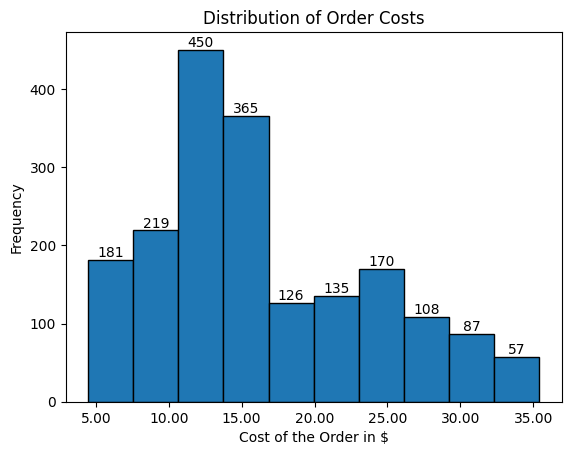

Cost ranges for total order counts:
(4.47, 7.56]      181.0
(7.56, 10.66]     219.0
(10.66, 13.75]    450.0
(13.75, 16.85]    365.0
(16.85, 19.94]    126.0
(19.94, 23.03]    135.0
(23.03, 26.13]    170.0
(26.13, 29.22]    108.0
(29.22, 32.32]     87.0
(32.32, 35.41]     57.0
dtype: float64


In [9]:
import matplotlib.ticker as ticker

#Plot the histogram showing the distribution of order costs
hist_values, bins, patches = plt.hist(df['cost_of_the_order'], edgecolor='black')

#Annotate each bar with its count
for count, patch in zip(hist_values, patches):
    plt.annotate(str(int(count)), xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                 ha='center', va='bottom')

plt.xlabel('Cost of the Order in $')
plt.ylabel('Frequency')
plt.title('Distribution of Order Costs')

#Format bin edges to show only 2 decimal places
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

#Create intervals for bin ranges using only 2 decimal places
bins = [round(bin, 2) for bin in bins]
bin_ranges = [pd.Interval(bins[i], bins[i+1]) for i in range(len(bins)-1)]

#Create a Series mapping bin ranges to counts
series_with_ranges = pd.Series(hist_values, index=pd.IntervalIndex(bin_ranges))

#Print the series from highest to lowest values
print('Cost ranges for total order counts:')
print(series_with_ranges)

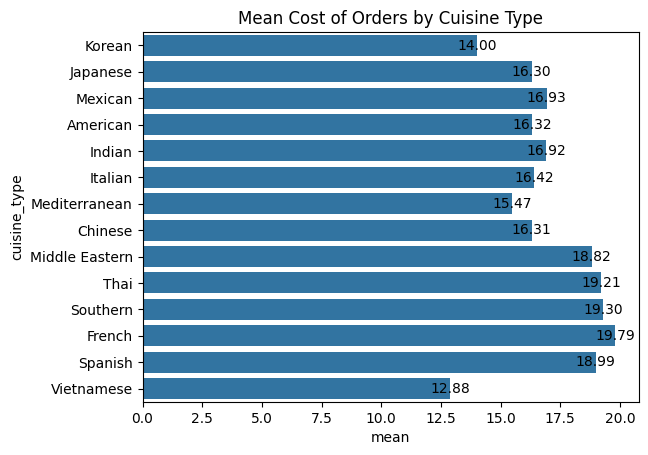

Mean cost of orders by cuisine type:
cuisine_type
French            19.79
Southern          19.30
Thai              19.21
Spanish           18.99
Middle Eastern    18.82
Mexican           16.93
Indian            16.92
Italian           16.42
American          16.32
Chinese           16.31
Japanese          16.30
Mediterranean     15.47
Korean            14.00
Vietnamese        12.88
Name: cost_of_the_order, dtype: float64


In [10]:
#Plot the cost of orders by cuisine type using a barchart
df['mean'] = df.groupby('cuisine_type')['cost_of_the_order'].transform('mean')
ax = sns.barplot(data=df, x="mean", y="cuisine_type" )

#Iterate over the bars and add mean labels
for p in ax.patches:
    width = p.get_width()       # get bar width
    height = p.get_height()     # get bar height
    x, y = p.get_xy()           # bottom left corner of the bar
    ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2), ha='center', va='center')
plt.title('Mean Cost of Orders by Cuisine Type')
plt.show()

#Print results of mean cost by cuisine type from highest to lowest value
print('Mean cost of orders by cuisine type:')
print(df.groupby('cuisine_type')['cost_of_the_order'].mean().round(2).sort_values(ascending=False))

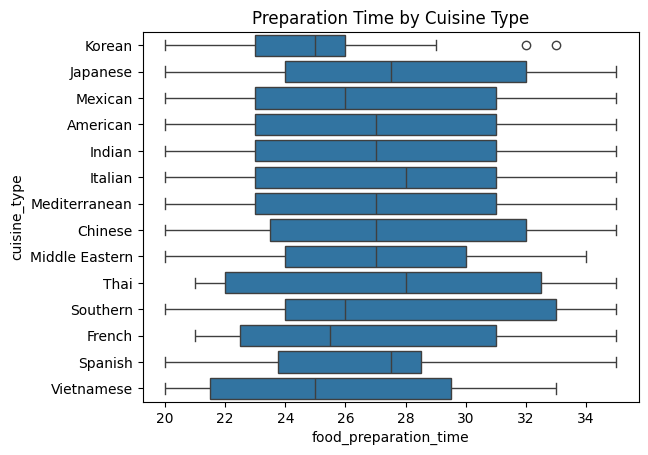

Mean preparation times by cuisine type:
cuisine_type
Southern          27.59
Chinese           27.51
Japanese          27.51
Italian           27.48
American          27.44
Thai              27.32
Indian            27.11
Mediterranean     27.00
Spanish           26.92
French            26.89
Mexican           26.73
Middle Eastern    26.67
Vietnamese        25.71
Korean            25.46
Name: food_preparation_time, dtype: float64


In [11]:
#Show mean preparation time by cuisine type using a box plot
x = df['food_preparation_time']
y = df['cuisine_type']
mean_prep_times = df.groupby('cuisine_type')['food_preparation_time'].mean().reset_index()
sns.boxplot(x='food_preparation_time', y='cuisine_type', data=df)
plt.title('Preparation Time by Cuisine Type')
plt.show()

#Print mean for each cuisine type rounded to 2 decimal places
print('Mean preparation times by cuisine type:')
print(df.groupby('cuisine_type')['food_preparation_time'].mean().round(2).sort_values(ascending=False))

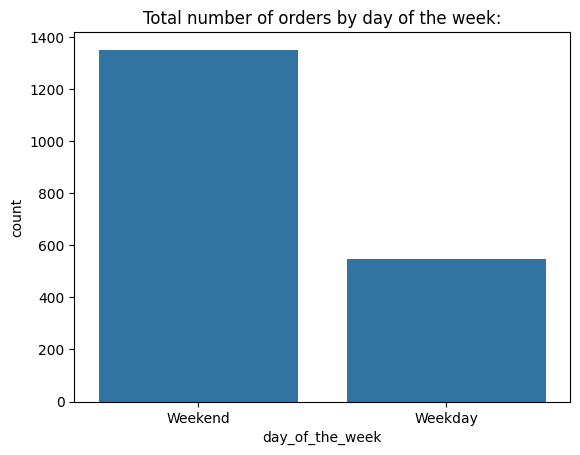

Total orders by day of the week:
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


In [12]:
#Show total number of orders by Weekday and Weekend
sns.countplot(x="day_of_the_week", data=df)
plt.title("Total number of orders by day of the week:")
plt.show()

#Print total number of orders by day of the week
print('Total orders by day of the week:')
print(df['day_of_the_week'].value_counts())

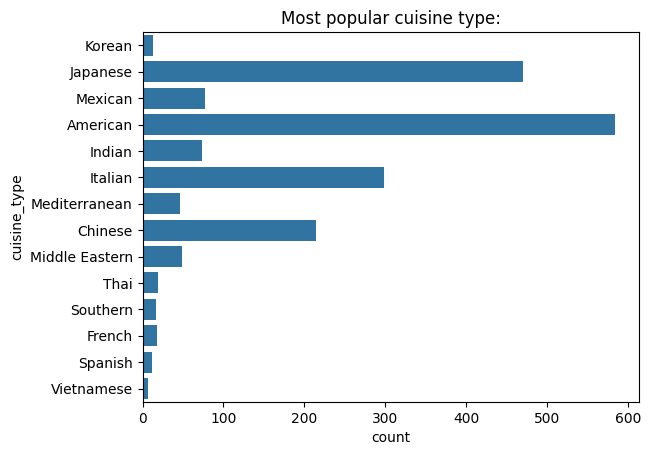

Most popular cuisine type:
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


In [13]:
#Show the most popular cuisine type using order totals
sns.countplot(y="cuisine_type", data=df)
plt.title("Most popular cuisine type:")
plt.show()

#Print total number of orders by cuisine type from countplot
print('Most popular cuisine type:')
print(df['cuisine_type'].value_counts())

### Which are the top 5 restaurants in terms of the number of orders received?

In [14]:
#Print top 5 restaurants with cuisine type sorted by number of orders received
print("Top 5 restaurants in terms of the number of orders received:")
print(df.groupby('restaurant_name')['cuisine_type'].value_counts().sort_values(ascending=False).head(5))

Top 5 restaurants in terms of the number of orders received:
restaurant_name            cuisine_type
Shake Shack                American        219
Blue Ribbon Sushi          Japanese        119
The Meatball Shop          Italian         112
Blue Ribbon Fried Chicken  American         96
Parm                       Italian          68
Name: count, dtype: int64


#### Observations:
The top 5 restaurants based on order count from the DataSet have been obtained. The result lists the name of each restaurant accompanied by cuisine type and order count in descending order, from which one can infer indicates popularity and demand among the customers in the dataset.

### Which is the most popular cuisine on weekends?

In [15]:
print("Most popular cuisine on the weekends:")
print(df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax())

Most popular cuisine on the weekends:
American


In [16]:
#Additional Data for analysis only
print("Least popular cuisine on the weekends:")
print(df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmin())
print("Most popular cuisine on the weekdays:")
print(df[df['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts().idxmax())
print("Least popular cuisine on the weekdays:")
print(df[df['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts().idxmin())

Least popular cuisine on the weekends:
Vietnamese
Most popular cuisine on the weekdays:
American
Least popular cuisine on the weekdays:
Spanish


#### Observations:
Based on the result of 'American' cuisine being the most frequently ordered on the weekends, one can infer that the consumer preference might be leaning towards this trend.

### What percentage of the orders cost more than 20 dollars?

In [17]:
#Print % of orders costing more than $20
print("The percentage of the orders that cost more than 20 dollars:")
if (df['cost_of_the_order'] > 20).mean() == 1:
  print("100%")
else:
  print(f"{(df['cost_of_the_order'] > 20).mean() * 100:.2f}", "%")

The percentage of the orders that cost more than 20 dollars:
29.24 %


#### Observations:
Looking at the result of 29.24%, one can infer that a majority of the orders have a spending pattern below the amount of $20, and that spending patterns, pricing strategies, as well as customer preferences might need to be addressed for higher profitability.

### What is the mean order delivery time?

In [18]:
#Print mean order delivery time across all restuarants
print("The mean order delivery time:")
print(f"{df['delivery_time'].mean():.2f}", "minutes")

The mean order delivery time:
24.16 minutes


#### Observations:
The average ordering time is 24.16 minutes, which is an important metric for evaluating the efficienty of delivery operations leading to customer satisfaction and/or the need for improvement of the delivery process in general.

### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [19]:
#Find 3 most frequent customers by ID and total number of orders placed
print("The 3 most frequent customers and their total orders are:")
print(df['customer_id'].value_counts().head(3))

The 3 most frequent customers and their total orders are:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
Customer 52832  placed the highest number of orders (13), followed by 47440 (10), and in third place 83287 (9). The rankings help provide insight into the most active customers in the DataSet, which in turn can be an important metric for establishing customer loyalty programs, more targeted marketing, as well as understanding customer behaviour in general.

### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (In theory, it is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


In [20]:
import scipy.stats as stats

# Separate data for weekdays and weekends
weekdays = df[df['day_of_the_week'] == 'Weekday']
weekends = df[df['day_of_the_week'] == 'Weekend']

# Calculate mean times for weekdays and weekends
mean_food_prep_weekdays = weekdays['food_preparation_time'].mean()
mean_delivery_weekdays = weekdays['delivery_time'].mean()
mean_food_prep_weekends = weekends['food_preparation_time'].mean()
mean_delivery_weekends = weekends['delivery_time'].mean()

# Compare means using a t-test
t_statistic, p_value = stats.ttest_ind(weekdays[['food_preparation_time', 'delivery_time']],
                                       weekends[['food_preparation_time', 'delivery_time']])

print("Mean Food Prep Time (Weekdays):", mean_food_prep_weekdays)
print("Mean Delivery Time (Weekdays):", mean_delivery_weekdays)
print("Mean Food Prep Time (Weekends):", mean_food_prep_weekends)
print("Mean Delivery Time (Weekends):", mean_delivery_weekends)

print("\nT-statistic:", t_statistic)
print("P-value:", p_value)

# Check for significance
significance_level = 0.05
if isinstance(p_value, float) and p_value < significance_level:
    print("There is a significant difference in mean times between weekdays and weekends.")
else:
    print("There is no significant difference in mean times between weekdays and weekends.")

Mean Food Prep Time (Weekdays): 27.212065813528337
Mean Delivery Time (Weekdays): 28.340036563071298
Mean Food Prep Time (Weekends): 27.436713545521837
Mean Delivery Time (Weekends): 22.4700222057735

T-statistic: [-0.9568679  27.55913813]
P-value: [3.38755926e-001 6.81238586e-141]
There is no significant difference in mean times between weekdays and weekends.


In [21]:
# Filter orders made on weekends and weekdays separately
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
weekday_orders = df[df['day_of_the_week'] == 'Weekday']

# Count the occurrences of Japanese cuisine on weekends and weekdays
japanese_weekend_count = weekend_orders[weekend_orders['cuisine_type'] == 'Japanese'].shape[0]
japanese_weekday_count = weekday_orders[weekday_orders['cuisine_type'] == 'Japanese'].shape[0]

# Calculate the difference and ratio
difference = japanese_weekend_count - japanese_weekday_count
ratio = japanese_weekend_count / japanese_weekday_count if japanese_weekday_count != 0 else float('inf')  # Avoid division by zero

print(f"How much more popular is Japanese food on the weekend compared to weekdays? \nDifference: {difference}\nRatio: {ratio}")

How much more popular is Japanese food on the weekend compared to weekdays? 
Difference: 200
Ratio: 2.4814814814814814


### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [22]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()
# get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# filter to get the names of restaurants that have rating greater than 4
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()
#print the restaurant_name in df_mean_4 with rating higher than 4
print("The restaurants that get the promotional offer are:")
print(df_mean_4[df_mean_4['rating'] > 4]['restaurant_name'].unique())
#list the cuisine type of restaurants that get the promotional offer
print("The cuisine types of the restaurants that get the promotional offer are:")
print(df_mean_4[df_mean_4['rating'] > 4]['cuisine_type'].unique())

The restaurants that get the promotional offer are:
['Blue Ribbon Fried Chicken' 'Shake Shack' 'The Meatball Shop' 'Parm'
 'RedFarm Broadway' 'RedFarm Hudson' 'Blue Ribbon Sushi']
The cuisine types of the restaurants that get the promotional offer are:
['American' 'Italian' 'Chinese' 'Japanese']


#### Observations:
This analysis helps to identify the highly rated restaurants with sufficient data to be considered reliable, providing insight into customer satisfaction across the different establishments. Looking a little closer at the restaurants as defined by their cuisine type, we can see that only 4 out of the total 14 types of cuisines offered make the list. Additional analysis should be done to further rank the other cuisines by their ratings.

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [23]:
#calculate charges for orders >$20 and *0.25
charges_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25
#calculate charges for orders >$5 and *0.15
charges_for_all_over_5 = df[df['cost_of_the_order'] > 5]['cost_of_the_order'] * 0.15
# Subtract charges for orders > $20 from charges for all orders > $5 to get charges only for orders between $5 and $20
charges_between_5_and_20 = charges_for_all_over_5.sum() - charges_over_20.sum()
#calculate net revenue by totalling the sums
total_revenue = df['cost_of_the_order'].sum() + charges_over_20.sum() + charges_between_5_and_20.sum()
print(f"The net revenue generated by the company across all orders is: $ {total_revenue:.2f}")

The net revenue generated by the company across all orders is: $ 36005.63


#### Observations:
This calculation assumes no commission is charged for orders with a cost below $5. This approach allows the company to quantify its revenue generation from high value orders, and provides insights into the effectiveness of its pricing strategy and potential impact of adjusting commission rates for different order cost segments.

### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [24]:
print("The percentage of orders that take more than 60 minutes to get delivered:")
print(f"{((df['food_preparation_time'] + df['delivery_time']) > 60).mean() * 100:.2f}", "%")

The percentage of orders that take more than 60 minutes to get delivered:
10.54 %


#### Observations:
The percentage of orders that take more than 60 minutes to be delivered is relatively small and is valuable information for identifying operational inefficiences, planning resources and improving service standards. With further analysis, there is room for improvement if the restaurants can be identified that frequently fall into this category.

### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [25]:
#Calculate the mean delivery time for weekends and weekdays
mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean()
print("The mean delivery time for weekdays and weekends are:")
print(mean_delivery_times)
#Show the difference between Weekday and Weekend as number within 2 decimal places
f = lambda x: round(x, 2)
time_difference = mean_delivery_times['Weekday'] - mean_delivery_times['Weekend']
print("The average time difference between a weekday and a weekend delivery is:", f(time_difference), "minutes.")
print('The weekend delivery time average is', f(time_difference), 'minutes faster than the weekday delivery average.')

The mean delivery time for weekdays and weekends are:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64
The average time difference between a weekday and a weekend delivery is: 5.87 minutes.
The weekend delivery time average is 5.87 minutes faster than the weekday delivery average.


#### Observations:
Based on the above data, the orders are processed and delivered more quickly on the weekends as compared to weekdays. Faster delivery times on the weekends might suggest that there may be more streamlined and efficient staffing and logistics in place during that time. However, delivery times might also be impacted by variations in order volume, meaning there might exist a correlation between higher order volume leading to slower delivery times or vice versa.



### Conclusion and Recommendations

### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
Based on customer order patterns taking into account food preparation and delivery times, order costs, and cuisine types across different days of the week, there are several key findings.

American cuisine is consistently the most popular cuisine type as it ranks highest on both the weekdays and the weekends; Japanese and Italian follow, with Vietnamese being the least popular overall with only 7 orders. In terms of order volume, the American cuisine restaurant Shake Shack leads with 219 orders, followed by the Japanese cuisine of Blue Ribbon Sushi with 119 total orders. Across the list of cuisine types, the average food preparation time is 27.37 minutes, with Korean cuisine having the shortest average preparation time of 25.46 minutes, while Southern cuisine has the longest at 27.59 minutes.

When looking at order cost, French cuisine is the most expensive with an average cost at $19.79, while Vietnamese is the least expensive at $12.88.  Currently, 29.24% of the orders cost more than $20. There is also a notable difference between days of the week. Weekends have significantly higher order volumes (1351 orders) compared to weekdays (547 orders). The average delivery times vary as well, with the weekday average time being 28.34 minutes and the weekend average being 22.47 minutes. This comparison can carry over into cuisine popularity, with American being the most popular for both times, Vietnamese being the least popular on the weekends, and Spanish cuisine the least popular on the weekdays.

In conclusion, as a basic observation American cuisine can be labeled as popular due to the strong customer preference as shown in total order volume across different times of the week. Higher order volumes and faster delivery times on weekends indicate that operations are more efficient during these times or that customer demand is managed more effectively. There are noticeable differences in preparation times by cuisine type, with Korean and Vietnamese being quicker compared to others. This could impact customer satisfaction and operational efficiency. The cost of orders varies significantly, with a higher frequency of lower-cost orders. The faster delivery times on weekends highlight potential inefficiencies in weekday operations. There is a substantial percentage of orders exceeding 60 minutes, which suggests room for improvement in delivery logistics.

### Recommendations:

Recommendations can be made to improve overall business performance. Operational efficiency should be targeted for improvement on the weekdays. This includes assessing staffing needs to handle peak hours and reduce delivery times, It is also important to identify “bottlenecks” during weekday operations to streamline processes that might be hindering efficient delivery and food prep times. It would be helpful to leverage the popularity of American cuisine through marketing, such as promotions or special deals to further drive sales. Owners should consider expanding or enhancing their cuisine menu to capitalize on popularity. On the opposite end of the spectrum, high-cost cuisines like French might look to introduce value based pricing to attract more customers, and for lower-cost cuisines like Vietnamese, exploring ways to increase average order value through upselling or cross selling might be beneficial. In terms of customer satisfaction, communication and good service is paramount for better ratings. Customers should be given a frame of reference about expected delivery times, as well as opportunities through reward programs to help enhance the  appreciation of their return business.  Regular analysis should be maintained so that operations and customer preferences can be aligned to continually improve business outcomes.

---

In [26]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/FoodHub_Project/FDS_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/FoodHub_Project/FDS_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 897136 bytes to /content/drive/MyDrive/FoodHub_Project/FDS_Project_LearnerNotebook_FullCode.html
